In [43]:
import numpy as np
import scipy.integrate as sci
import time
import matplotlib.pyplot as plt

In [44]:
def f(t, y): # RHS of Arenstorf problem
    mu = 0.012277471
    mup = 1 - mu
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    r1 = np.sqrt((y[0] + mu)**2 + y[1]**2)
    r2 = np.sqrt((y[0] - mup)**2 + y[1]**2)
    dy[2] = y[0] + 2*y[3] - mup*(y[0] + mu)/r1**3 - mu*(y[0] - mup)/r2**3
    dy[3] = y[1] - 2*y[2] - mup*y[1]/r1**3 - mu*y[1]/r2**3
    return dy


# parameters
y0 = [0.994, 0, 0, -2.00158510637908252240537862224]
tmax_list = [17.0652165601579625588917206249, 100]
sols = []
eps = 1e-12
method_list = ["RK45", "DOP853", "Radau"]

for method in method_list:
    for tmax in tmax_list:
            
        # dictionary with method name, tmax
        sol_entry = {
            "method": method,
            "tmax": tmax
        }  

        # solve by RK45/DOP853/Radau
        start_time = time.time()
        sol = sci.solve_ivp(f, [0,tmax], y0, method = method, rtol = eps, atol = eps)
        tcpu = time.time() - start_time
        sol_entry["tcpu"] = tcpu
        sol_entry["sol"] = sol.y
        sols.append(sol_entry)
        print("\nmethod:", method, "tmax:", tmax, "tcpu:", tcpu)
print("\nDONE")


method: RK45 tmax: 17.065216560157964 tcpu: 0.2234203815460205

method: RK45 tmax: 100 tcpu: 1.1541492938995361

method: DOP853 tmax: 17.065216560157964 tcpu: 0.06897878646850586

method: DOP853 tmax: 100 tcpu: 0.36502504348754883

method: Radau tmax: 17.065216560157964 tcpu: 3.161236047744751

method: Radau tmax: 100 tcpu: 22.27966856956482

DONE


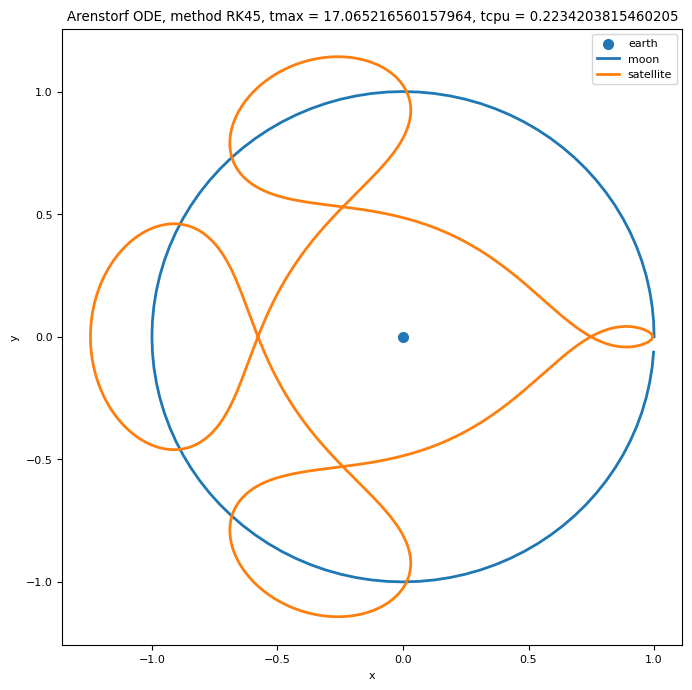

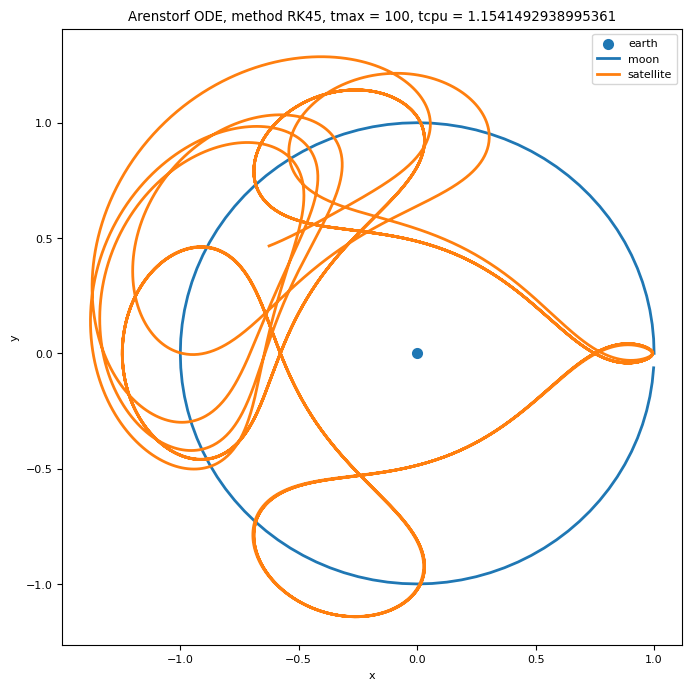

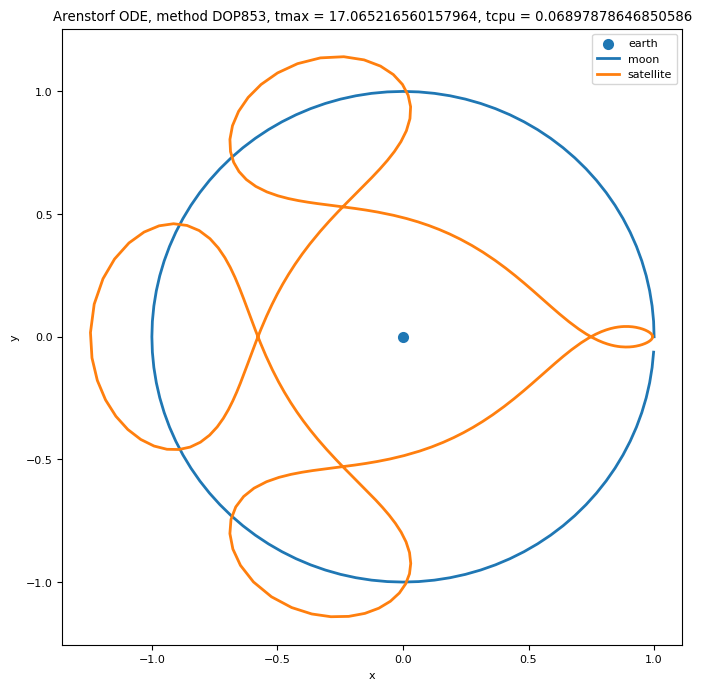

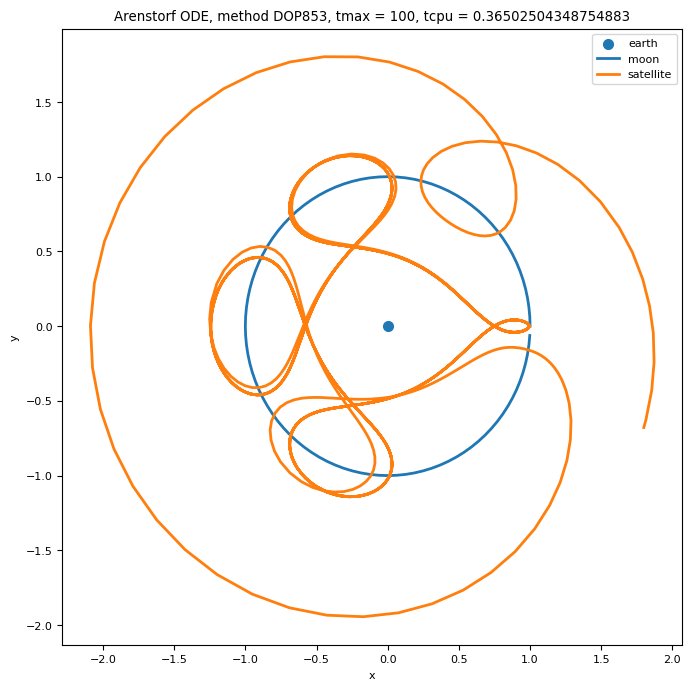

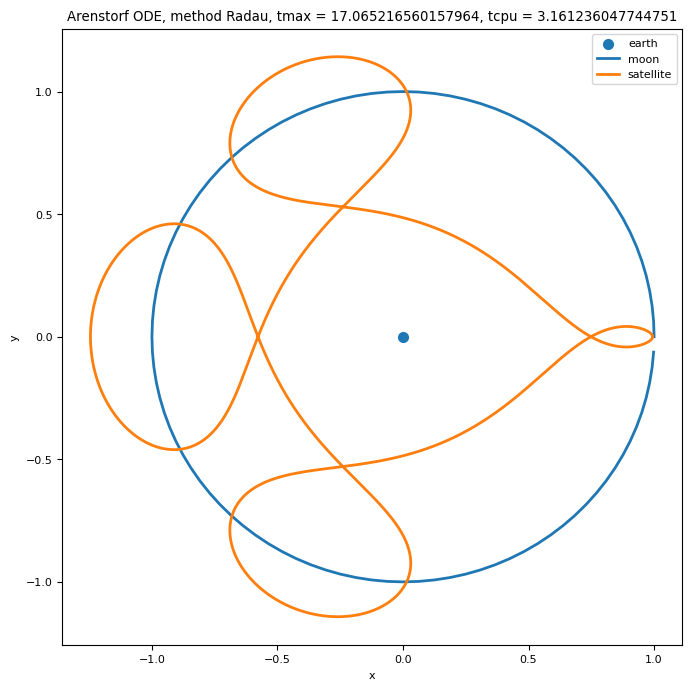

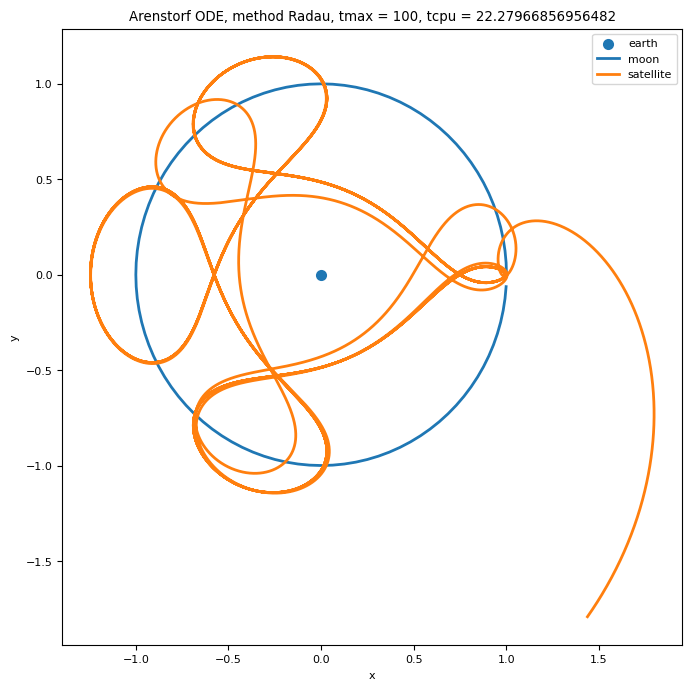

In [45]:
for sol in sols:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.rcParams.update({'font.size': 8})
    plt.scatter([0], [0], linewidth=2, label="earth")
    n = 100
    t = [2*np.pi*i/n for i in range(n)]
    plt.plot(np.cos(t), np.sin(t), linewidth=2, label="moon")
    plt.plot(sol["sol"][0], sol["sol"][1], linewidth=2, label="satellite")
    plt.title("Arenstorf ODE, method {}, tmax = {}, tcpu = {}".format(sol["method"], sol["tmax"], sol["tcpu"]))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()